In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

## Styrofoam Data

In [2]:
file = open('Lab6StyrofoamCup1.csv', 'r')
time_total, temperature_total  = np.loadtxt("Lab6StyrofoamCup1.csv", delimiter=",", skiprows=1, usecols=(0,1), unpack=True)

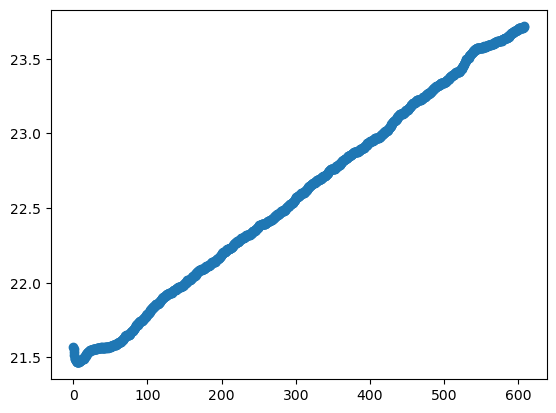

In [3]:
plt.scatter(time_total, temperature_total)

In [4]:
start_time = 100
stop_time = 500
in_range = (time_total >= start_time) & (time_total <= stop_time)
time, temperature = time_total[in_range], temperature_total[in_range]

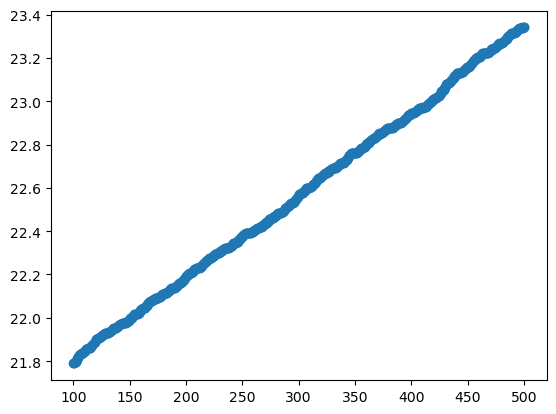

In [5]:
plt.scatter(time, temperature)

Fitted delta_T0: 21.442281376005422
Fitted beta: 5876.33543162963


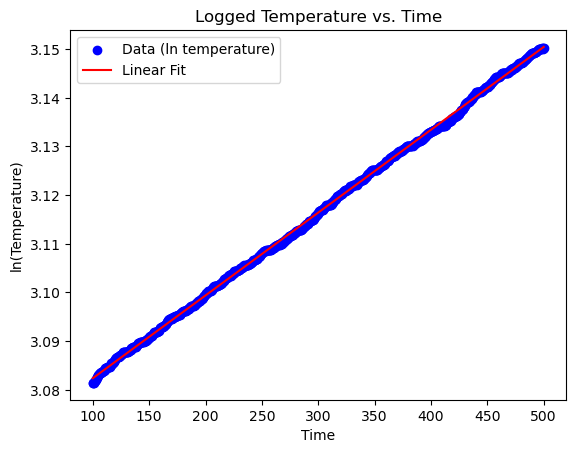

In [6]:
ln_temperature = np.log(temperature)

slope, intercept, r_value, p_value, std_err = linregress(time, ln_temperature)

T0_fit = np.exp(intercept)
beta_fit = 1 / slope

print(f"Fitted delta_T0: {T0_fit}")
print(f"Fitted beta: {beta_fit}")

plt.scatter(time, ln_temperature, label='Data (ln temperature)', color='blue')
plt.plot(time, slope * time + intercept, label='Linear Fit', color='red')
plt.xlabel('Time')
plt.ylabel('ln(Temperature)')
plt.title("Logged Temperature vs. Time")
plt.legend()
plt.show()

In [7]:
m = 0.114 # kg
c = 4184 # J/ kg C
l = 0.0028 # m
A = 2 * np.pi * 3.105 * 4 *10**-4 #m^2
beta = beta_fit 

k = (m * c * l) / (A * beta)
print(f"Calculated k: {k}") # W/msC

Calculated k: 0.029123697816010333
